In [2]:
from __future__ import division
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets.samples_generator import make_classification, make_regression
from sklearn.metrics import classification_report, accuracy_score
from sklearn import linear_model

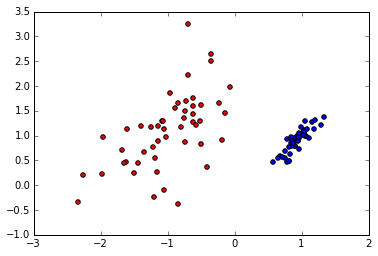

In [37]:
# randomly generate a regression sample dataset
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1) 

class0 = np.where(y==0)[0]
class1 = np.where(y==1)[0]

plt.scatter(X[class0, 0], X[class0, 1], c='r')
plt.scatter(X[class1, 0], X[class1, 1], c='b')
plt.show()

In [47]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def cost(theta, X, y):
    m = len(X)
    h = sigmoid(np.dot(X, theta)) 
    loss = (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    return loss

def grad(theta, X, y):
    h = sigmoid(np.dot(X, theta))
    grad = np.dot(h - y, X) / y.size
    return grad

def predict(theta, X):
    h = sigmoid(np.dot(X, theta))
    return h > 0.5

def predict_proba(theta, x):
    return sigmoid(theta[0] + x.dot(theta[1:].T))

In [39]:
alpha = 0.01
a = np.ones(shape=(len(X), 1))  
x_ = np.hstack((a, X))
theta = np.random.rand(x_.shape[1])
print theta

[ 0.97927563  0.69748498  0.46332155]


In [40]:
loss = cost(theta, x_, y)
print loss

0.667732388136


In [41]:
gradient = grad(theta, x_, y)
print gradient

[ 0.2803143  -0.35443529  0.36326429]


In [42]:
theta = theta - alpha * gradient
print theta

[ 0.97647249  0.70102934  0.45968891]


In [43]:
loss1 = cost(theta, x_, y)
print loss1

0.664376357972


In [44]:
def gradient_descent(x, y, alpha=0.01, iterations=1000, stop=0.0001):
    m = len(x)
    
    gradient = []
    
    a = np.ones(shape=(len(x), 1))  
    x_ = np.hstack((a, x))
    theta = np.random.rand(x_.shape[1])
    initial_loss = cost(theta, x_, y)
    
    for n in xrange(iterations):    
        g = grad(theta, x_, y)
        theta = theta - alpha * g
        loss = cost(theta, x_, y)
        
        if np.abs(initial_loss - loss) <= stop:
            print 'converged with {} iterations'.format(n)
            return theta, gradient
        
        initial_loss = loss
        gradient.append([n, initial_loss])
        
    print 'max iterations reached'
    return theta, gradient

In [45]:
theta, gradient = gradient_descent(X, y)
print theta

converged with 812 iterations
[ 0.35332475  2.17524718 -0.39019274]


In [46]:
y_true = y
y_pred = predict(theta, x_)

print 'Accuracy: {:.2f}%'.format(100 * accuracy_score(y_true, y_pred))
print classification_report(y_true, y_pred)

Accuracy: 100.00%
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        50
          1       1.00      1.00      1.00        50

avg / total       1.00      1.00      1.00       100



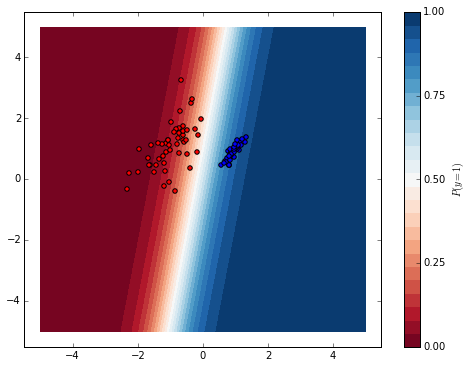

In [48]:
xx, yy = np.mgrid[-5:5:.01, -5:5:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = predict_proba(theta, grid).reshape(xx.shape)

f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(X[class0, 0], X[class0, 1], c='r')
ax.scatter(X[class1, 0], X[class1, 1], c='b')
plt.show()